In [1]:
import os
import sys
import matplotlib.pyplot as plt
import healpy as hp
import numpy as np
import pickle as pk
sys.path.append('../')

In [2]:
%load_ext autoreload
%autoreload 2
import libparam_cross as method

usage: ipykernel_launcher.py [-h] [-ivt] [-ivp] [-dd] [-delens] [-cl] inifile
ipykernel_launcher.py: error: unrecognized arguments: -f


Simulation uses /global/cscratch1/sd/lonappan/V2/litebird_s4mask/maps
Simulation uses a combination of /global/cscratch1/sd/lonappan/V2/litebird_s4mask/maps and /global/cscratch1/sd/lonappan/V3/cmbs4/maps
Simulation Warning: Default first filebase and first beam assumes LiteBird


../simulation.py:76: RuntimeWarning: invalid value encountered in true_divide
  self.w_lb = w_lb_/w_total * utils.cli(lb_fl)
../simulation.py:77: RuntimeWarning: invalid value encountered in true_divide
  self.w_s4 = w_s4_/w_total * utils.cli(s4_fl)
/global/homes/l/lonappan/.conda/envs/PC/lib/python3.6/site-packages/healpy/fitsfunc.py:369: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "
/global/homes/l/lonappan/.conda/envs/PC/lib/python3.6/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 2048
  warnings.warn("NSIDE = {0:d}".format(nside))
/global/homes/l/lonappan/.conda/envs/PC/lib/python3.6/site-packages/healpy/fitsfunc.py:400: UserWarning: ORDERING = RING in fits file
  warnings.wa

Delensing uses QE: p
Workspace intializing from /global/cscratch1/sd/lonappan/V3/litebird_LBplusS4/Pseudo/workspace/coupling_matrix.fits


Mean and STD of Bandpower: 100%|██████████| 13/13 [00:00<00:00, 860.10simulation/s]


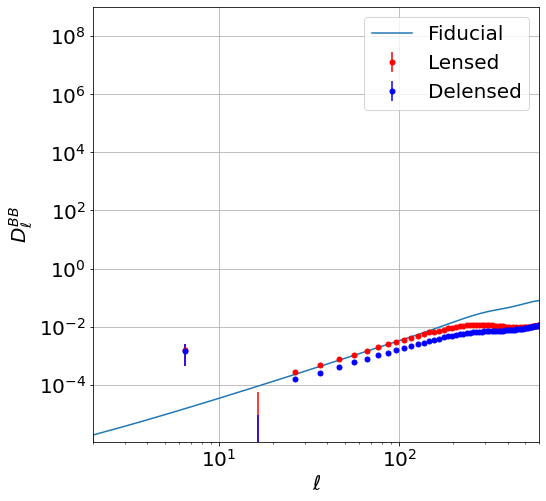

In [3]:
method.eff_lib.plot_stat(600)

In [4]:
fname='lb_s4_comb.pkl'
_,_,del_mean,_ = method.eff_lib.get_stat
pk.dump(del_mean-method.eff_lib.bias,open(fname,'wb'))

Mean and STD of Bandpower: 100%|██████████| 13/13 [00:00<00:00, 1070.42simulation/s]


In [4]:
method.eff_lib.fit_efficency(0,200)

OPTIMISATION INFO: Desired error not necessarily achieved due to precision loss.
OPTIMISATION INFO: Chisq_20 = 31.69231172046571
Efficency btw l=0 and l=200: 39.182244708119676


0.3918224470811968

In [8]:
path = '/global/cscratch1/sd/lonappan/V2/'
path1 = '/global/cscratch1/sd/lonappan/V3/'
folder = ['litebird','litebird_cmbs4','litebird_LBplusS4']

l,clb_lb,std_lb = pk.load(open(os.path.join(path,folder[0],'Efficency','spectra_diff_w_bias.pkl'),'rb'))
l,clb_lbs4,std_lbs4 = pk.load(open(os.path.join(path1,folder[1],'Efficency','spectra_diff_w_bias.pkl'),'rb'))
l,clb_lbPs4,std_lbPs4 = pk.load(open(os.path.join(path1,folder[2],'Efficency','spectra_diff_w_bias.pkl'),'rb'))

In [12]:
data = {}
data['l'] =l
data['lb'] = {'cb': clb_lb, 'std':std_lb}
data['lb_s4'] = {'cb': clb_lbs4, 'std':std_lbs4}
data['lbs4'] = {'cb': clb_lbPs4, 'std':std_lbPs4}

pk.dump(data, open('spectra_difference.pkl','wb'))

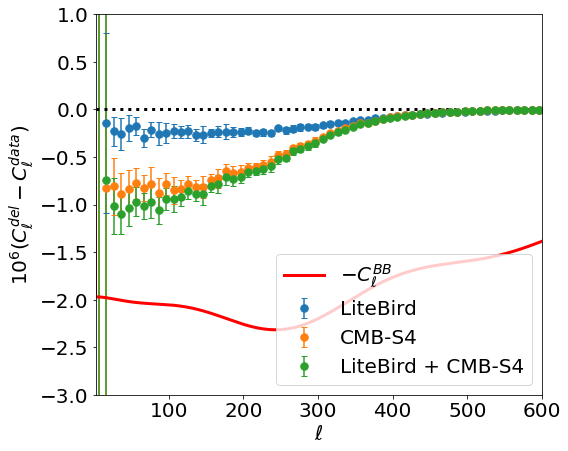

In [10]:
plt.figure(figsize=(8,7))
plt.plot(-method.cl_len['bb']*10**6,label='$-C_{\ell}^{BB}$',lw=3,c='r')
plt.axhline(0,c='k',ls=':',lw=3)
plt.errorbar(l,clb_lb*10**6,yerr=std_lb*10**6,fmt='.',markersize='15',capsize=3,label='LiteBird')
plt.errorbar(l,clb_lbs4*10**6,yerr=std_lbs4*10**6,fmt='.',markersize='15',capsize=3,label='CMB-S4')
plt.errorbar(l,clb_lbPs4*10**6,yerr=std_lbPs4*10**6,fmt='.',markersize='15',capsize=3,label='LiteBird + CMB-S4')
plt.legend(fontsize='20',loc='lower right')
plt.xlim(2,600)
plt.ylim(-3,1)
plt.xticks(fontsize='20')
plt.yticks(fontsize='20')
plt.xlabel('$\ell$',fontsize='20')    
plt.ylabel("$10^6(C_\ell^{del} - C_\ell^{data})$",fontsize='20')
plt.savefig('comparison.png', bbox_inches='tight')

In [5]:
method.eff_lib.spectrum_difference

(array([-4.01155143e-06, -1.45076244e-07, -2.31323219e-07, -2.56533052e-07,
        -1.97017209e-07, -1.72850287e-07, -3.03635096e-07, -2.14121758e-07,
        -2.53913944e-07, -2.51511095e-07, -2.27236654e-07, -2.38033419e-07,
        -2.31966493e-07, -2.67651574e-07, -2.65650330e-07, -2.46905527e-07,
        -2.35220222e-07, -2.33030589e-07, -2.39769730e-07, -2.36242982e-07,
        -2.24341643e-07, -2.44780250e-07, -2.38770728e-07, -2.48247462e-07,
        -2.00128658e-07, -2.21612799e-07, -2.01533031e-07, -1.87688933e-07,
        -1.80405258e-07, -1.83138611e-07, -1.64260299e-07, -1.49179434e-07,
        -1.42483748e-07, -1.43812104e-07, -1.24650035e-07, -1.13909769e-07,
        -1.13269417e-07, -9.33026453e-08, -8.60833616e-08, -7.57055063e-08,
        -6.64035715e-08, -6.06814255e-08, -5.65361674e-08, -4.95537917e-08,
        -4.38734208e-08, -3.75161295e-08, -3.37810359e-08, -2.89321217e-08,
        -2.54608670e-08, -2.23085107e-08, -1.84952059e-08, -1.50577745e-08,
        -1.2